In [ ]:


###### import libraries ###########
import joblib
import mlflow 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
from tqdm.auto import tqdm
from tqdm.notebook import tqdm
import joblib
from copy import deepcopy
import dataframe_image as dfi

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
###### imprt dataset #######

df = pd.read_csv('Android_Malware.csv', low_memory=False)

df.head(5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,44362.727273,86342.042540,217790.0,8.0,0.0,0.0,0,0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1.0,646.750000,126.375,993.666667,180.0,0,0.0,0.0,0.0,0.0,0.0,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000,0.000,0.000000,60.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,82192.800000,154845.683018,355945.0,7

In [20]:
df.shape

(355630, 86)

In [64]:
df.isnull().sum()

Unnamed: 0                      0
Flow ID                         1
 Source IP                      0
 Source Port                    0
 Destination IP                 0
 Destination Port               0
 Protocol                       0
 Timestamp                      0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std  

In [65]:
df.shape

(355630, 86)

In [66]:
df.mean()

Unnamed: 0                      1.945719e+03
 Source Port                    3.914129e+04
 Destination Port               5.202541e+03
 Protocol                       9.765190e+00
 Flow Duration                  1.092975e+07
 Total Fwd Packets              7.433718e+00
 Total Backward Packets         1.420368e+01
Total Length of Fwd Packets     6.796042e+02
 Total Length of Bwd Packets    1.129508e+04
 Fwd Packet Length Max          2.150150e+02
 Fwd Packet Length Min          1.252025e+01
 Fwd Packet Length Mean         5.964354e+01
 Fwd Packet Length Std          7.952551e+01
Bwd Packet Length Max           3.204076e+02
 Bwd Packet Length Min          2.305844e+01
 Bwd Packet Length Mean         1.685377e+02
 Bwd Packet Length Std          1.243850e+02
Flow Bytes/s                    8.398908e+04
 Flow Packets/s                 5.494580e+03
 Flow IAT Mean                  3.175805e+06
 Flow IAT Std                   2.426805e+06
 Flow IAT Max                   9.448524e+06
 Flow IAT 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

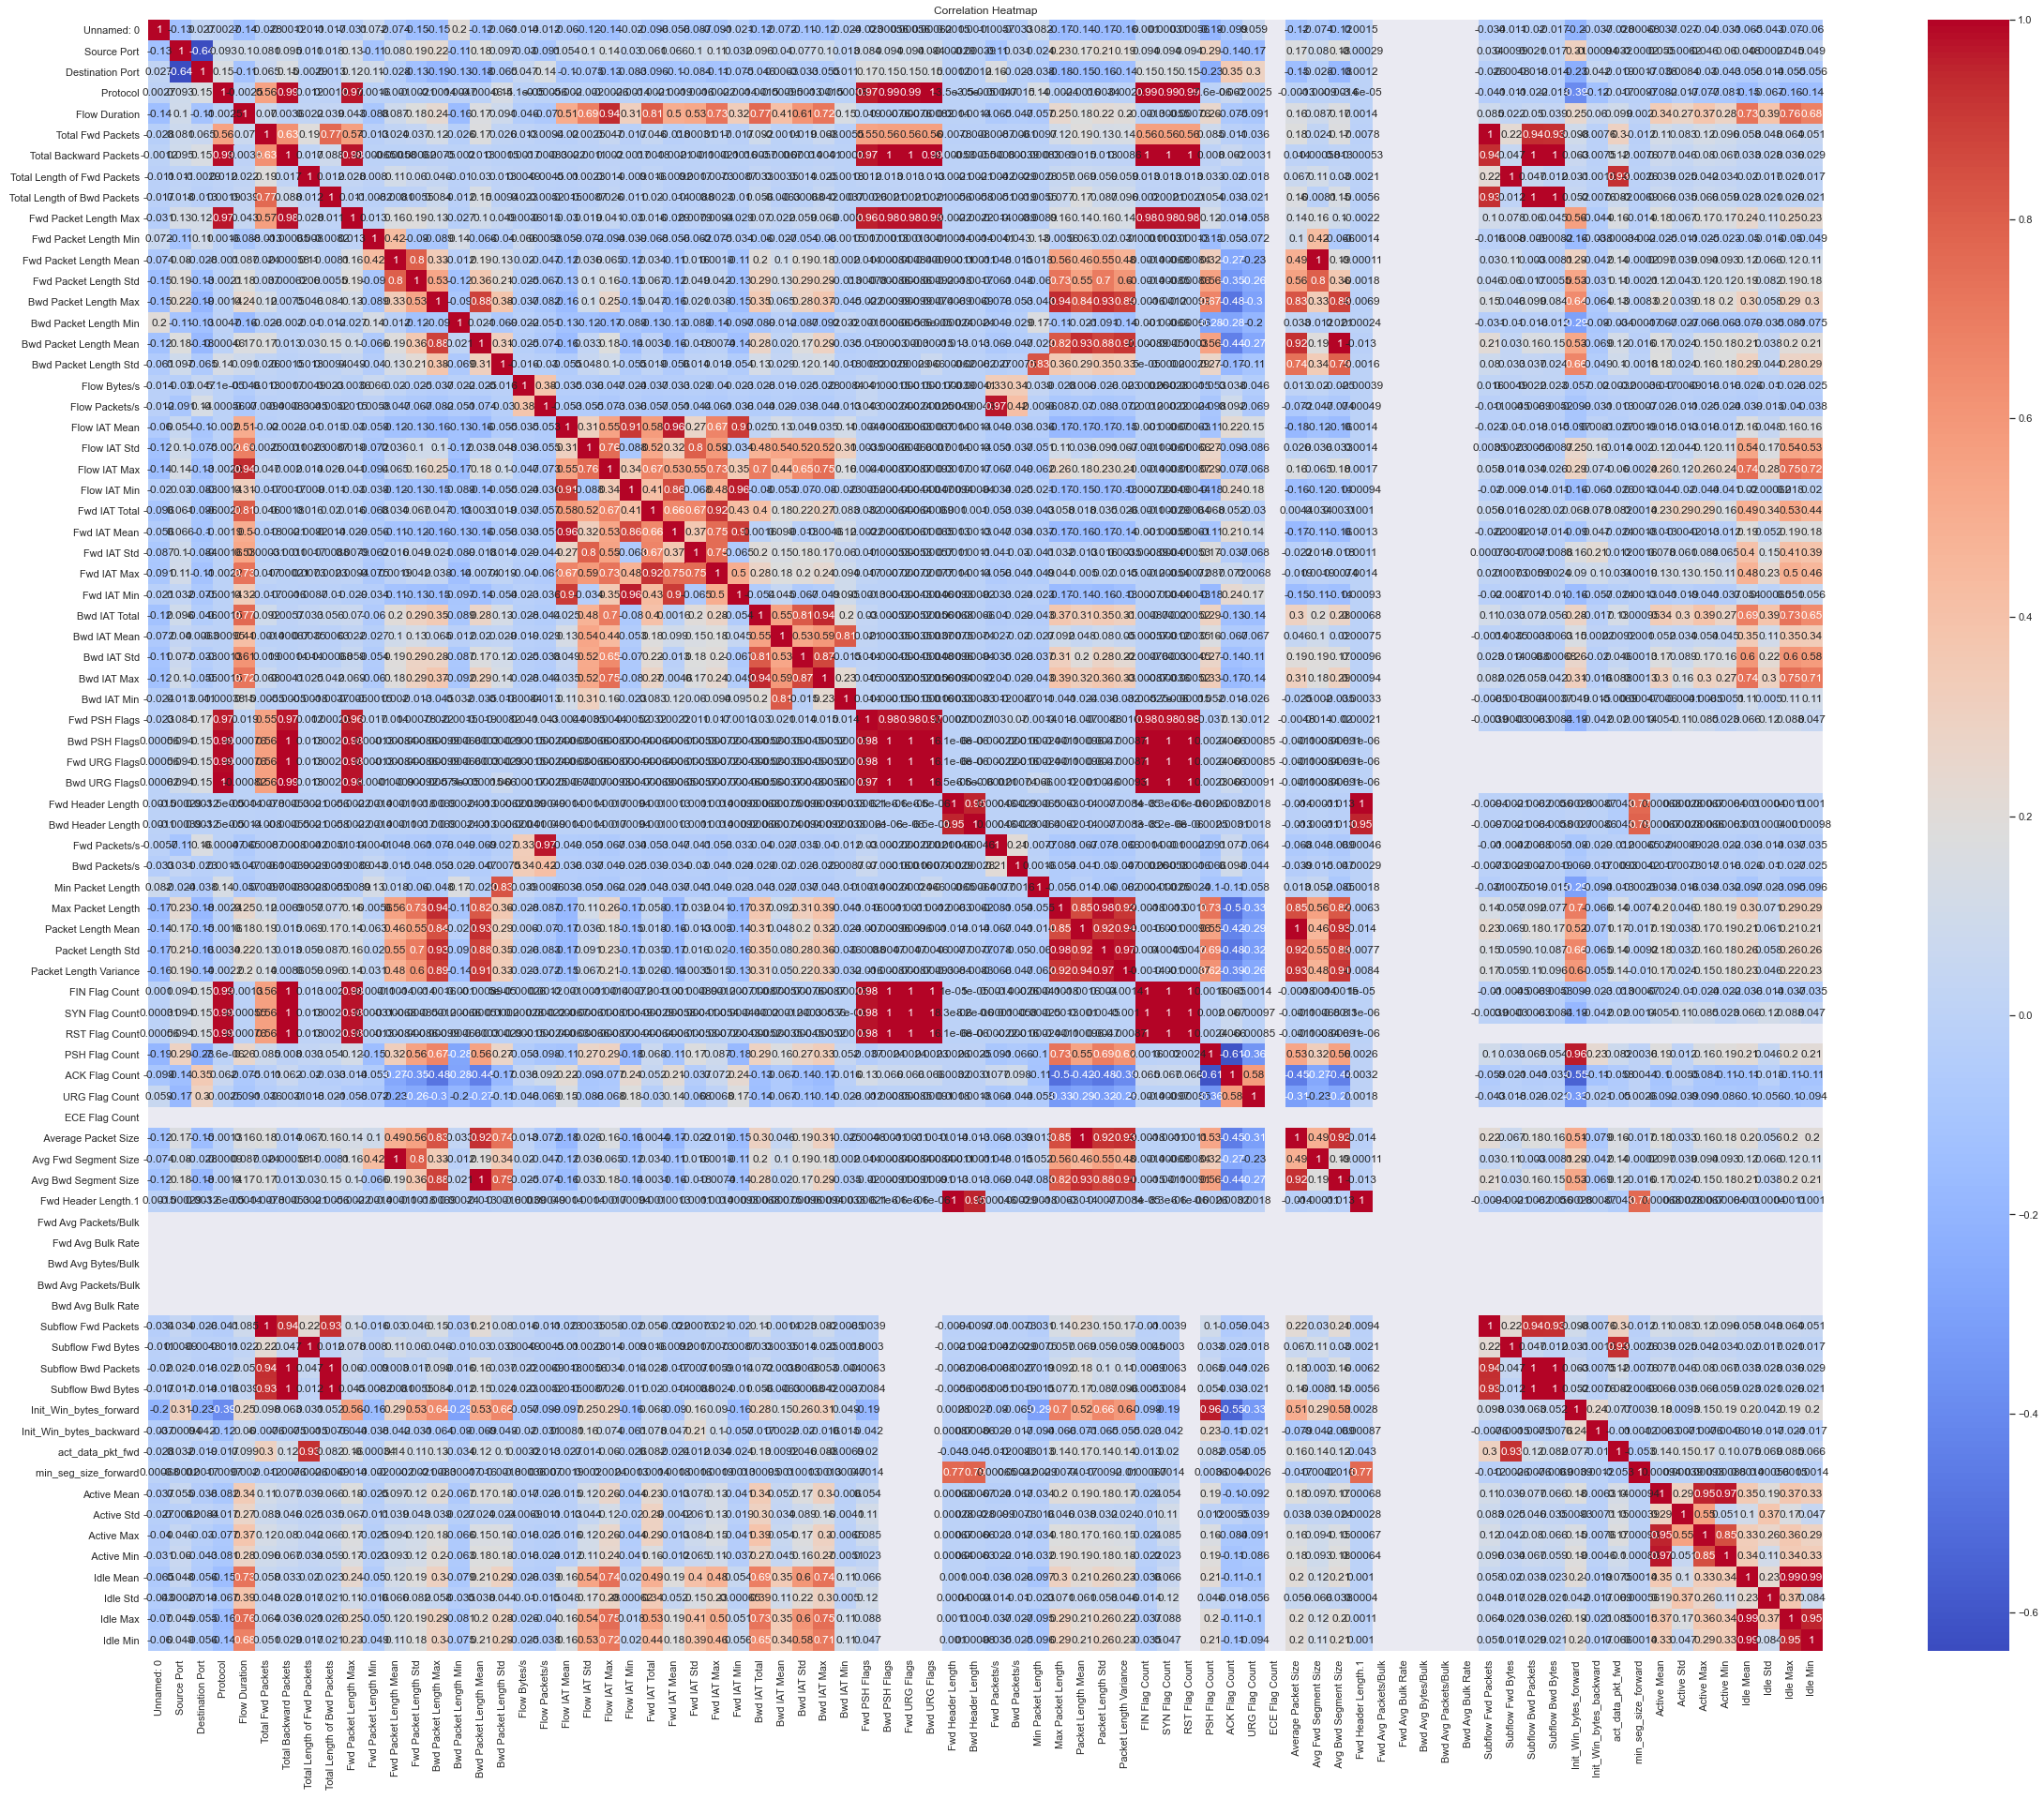

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap using Seaborn
sns.set()
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Adding title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [22]:
df["Label"].replace({"Android_Adware": 0, "Android_Scareware": 1,"Android_SMS_Malware":2,"Benign":3}, inplace=True)

In [23]:

################################################################################
##########      Below columns are highly correlated with another      ##########
##########      input columns except y column, so dropping the same   ##########
################################################################################


correlation = df.corr()['Label']
selected_features = correlation[correlation.abs() > 0.04].index.tolist()

print("Selected Features:", selected_features)

#print(cm)

Selected Features: ['Unnamed: 0', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Flow IAT Std', 'Bwd IAT Total', ' Bwd IAT Max', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size', ' Avg Bwd Segment Size', 'Label']


In [24]:
df = pd.DataFrame(df)

# Select specific columns
new_data = df[['Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Flow IAT Std', 'Bwd IAT Total', ' Bwd IAT Max', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size', ' Avg Bwd Segment Size', 'Label']]
print(new_data)

        Bwd Packet Length Max   Bwd Packet Length Mean   Flow IAT Std  \
0                         0.0                 0.000000   0.000000e+00   
1                         0.0                 0.000000   0.000000e+00   
2                      1460.0               993.666667   4.314810e+04   
3                         0.0                 0.000000   5.137131e+03   
4                      1460.0               946.500000   5.377887e+06   
...                       ...                      ...            ...   
355625                    0.0                 0.000000   0.000000e+00   
355626                  140.0               140.000000   0.000000e+00   
355627                 1460.0               791.875000   4.629064e+06   
355628                   48.0                48.000000   0.000000e+00   
355629                   92.0                92.000000   0.000000e+00   

        Bwd IAT Total   Bwd IAT Max   Max Packet Length   Packet Length Mean  \
0                 0.0           0.0        

In [25]:
#########################################################
###########     Dataset After Reducing Column    ########
#########################################################

new_data.head()

,Bwd Packet Length Max,Bwd Packet Length Mean,Flow IAT Std,Bwd IAT Total,Bwd IAT Max,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size,Label
0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,1460.0,993.666667,4.314810e+04,487990.0,217790.0,1460.0,615.952381,672.744786,452585.547619,646.750000,993.666667,0
3,0.0,0.000000,5.137131e+03,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1460.0,946.500000,5.377887e+06,410964.0,355945.0,1460.0,407.266667,626.958471,393076.923810,436.357143,946.500000,0


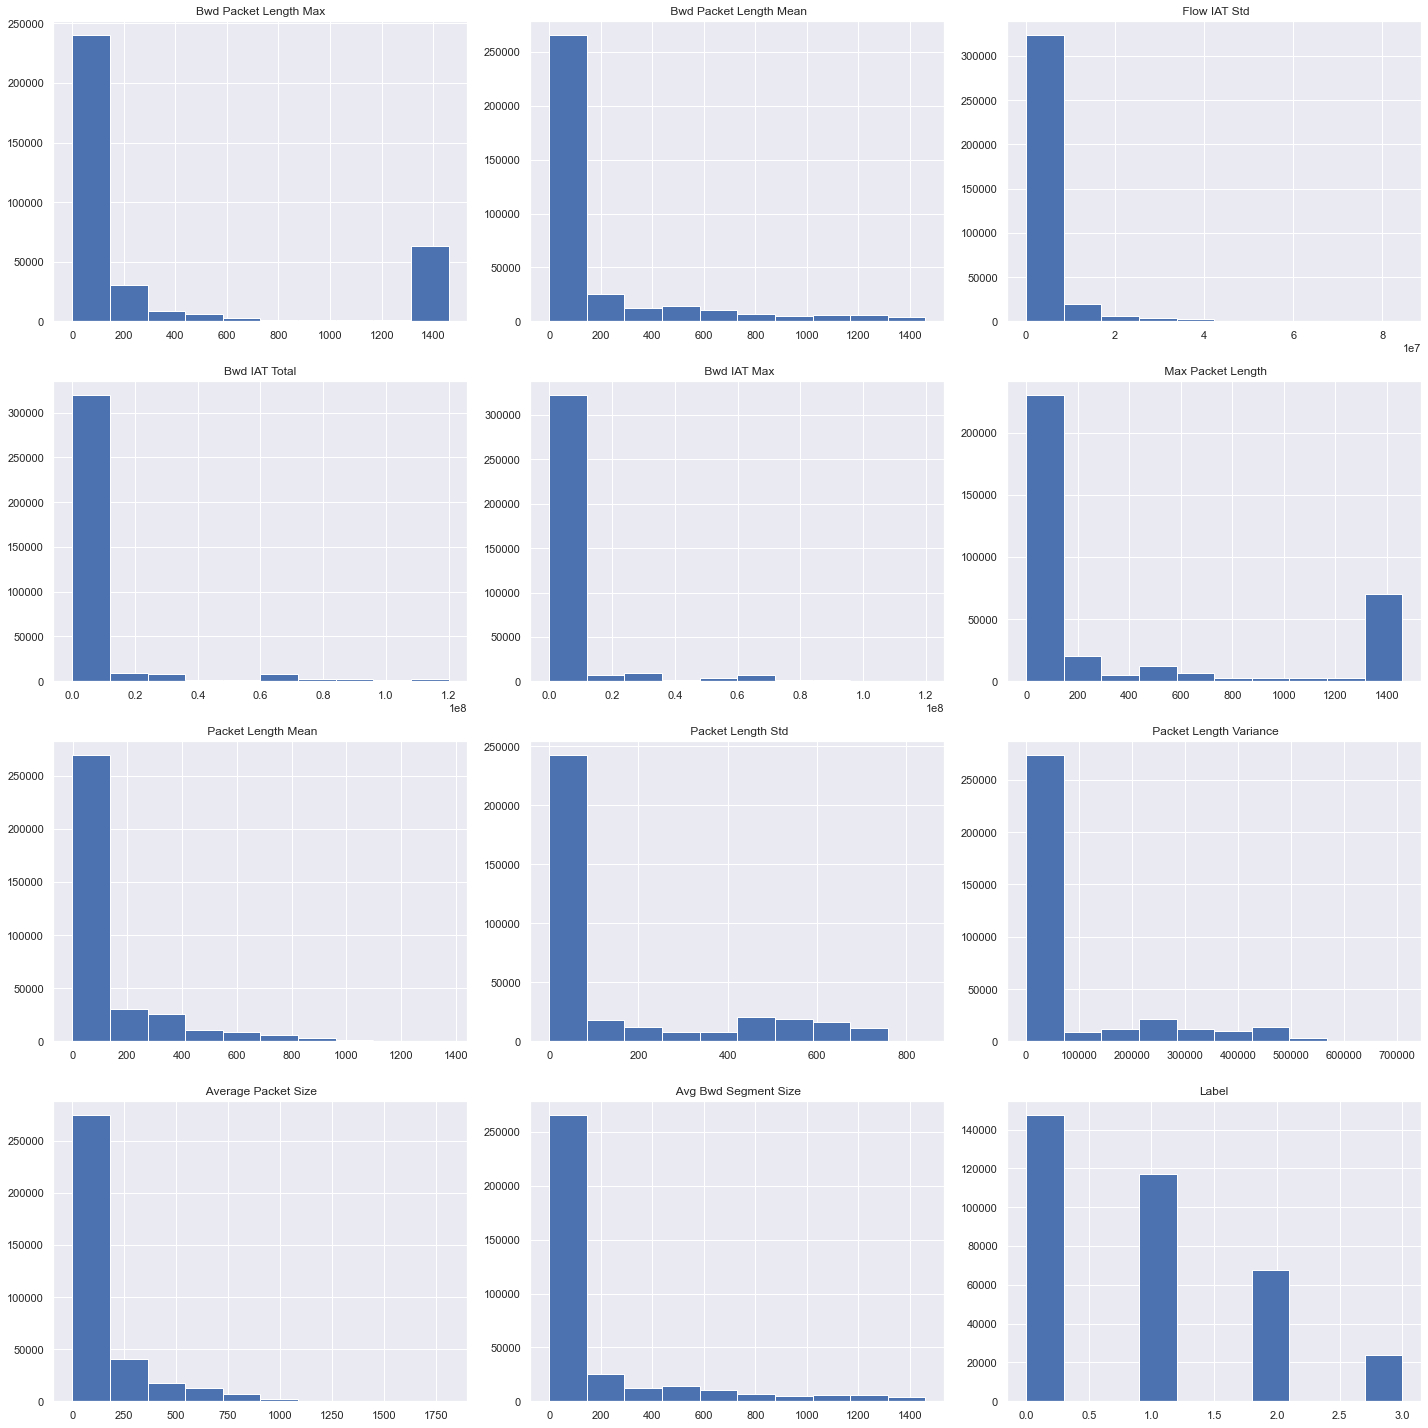

In [72]:
new_data.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

In [26]:
new_data = new_data.dropna()

In [27]:
X = new_data.loc[:,new_data.columns != 'Label']
y = new_data.loc[:,new_data.columns == 'Label']

In [28]:
X

,Bwd Packet Length Max,Bwd Packet Length Mean,Flow IAT Std,Bwd IAT Total,Bwd IAT Max,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size
0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1460.0,993.666667,4.314810e+04,487990.0,217790.0,1460.0,615.952381,672.744786,452585.547619,646.750000,993.666667
3,0.0,0.000000,5.137131e+03,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1460.0,946.500000,5.377887e+06,410964.0,355945.0,1460.0,407.266667,626.958471,393076.923810,436.357143,946.500000
...,...,...,...,...,...,...,...,...,...,...,...
355625,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
355626,140.0,140.000000,0.000000e+00,0.0,0.0,140.0,66.666667,63.508530,4033.333333,100.000000,140.000000
355627,1460.0,791.875000,4.629064e+06,232606.0,131587.0,1460.0,333.700000,584.144187,341224.431579,351.263158,791.875000
355628,48.0,48.000000,0.000000e+00,0.0,0.0,48.0,37.333333,9.237604,85.333333,56.000000,48.000000


In [29]:
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
355625,3
355626,3
355627,3
355628,3


In [30]:
#######.     DiVIDING DATA TO TESTING AND TRANING.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248938, 11)
(248938, 1)
(106689, 11)
(106689, 1)


In [31]:
X = new_data.loc[:,new_data.columns != 'Label']
y = new_data.loc[:,new_data.columns == 'Label']
y_train.value_counts()

Label
0        103220
1         81885
2         47260
3         16573
dtype: int64

In [16]:
#########################################
######      1-    KNN           #########
#########################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score




KNN = KNeighborsClassifier(n_neighbors=2)

KNN.fit(X_train,y_train)

KNN_predicted_y = KNN.predict(X_test)

KNN_CM = confusion_matrix(y_test,KNN_predicted_y)
print(KNN_CM)

# Accuracy Score
KNN_Accuracy_Score = round(accuracy_score(y_test,KNN_predicted_y)*100,2)
print('')
print('KNN_Accuracy_Score is ', KNN_Accuracy_Score)
# Classification Report
print(classification_report(y_test,KNN_predicted_y))
print('')
print('')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[22672 19976  1355   220]
 [14151 18846  2038   162]
 [ 6213 10114  3745    62]
 [ 3137  3496   351   151]]

KNN_Accuracy_Score is  42.57
              precision    recall  f1-score   support

           0       0.49      0.51      0.50     44223
           1       0.36      0.54      0.43     35197
           2       0.50      0.19      0.27     20134
           3       0.25      0.02      0.04      7135

    accuracy                           0.43    106689
   macro avg       0.40      0.31      0.31    106689
weighted avg       0.43      0.43      0.40    106689





In [17]:
#########################################
######      2-     SVM          #########
#########################################

from sklearn.svm import SVC
SVM = SVC()

SVM.fit(X_train,y_train)

SVM_predicted_y = SVM.predict(X_test)
SVM_CM = confusion_matrix(y_test,SVM_predicted_y)
print(SVM_CM)

# Accuracy Score
SVM_Accuracy_Score = round(accuracy_score(y_test,SVM_predicted_y)*100,2)
print('')
print('SVM_Accuracy_Score is ', SVM_Accuracy_Score)
# Classification Report
print(classification_report(y_test,SVM_predicted_y))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[42157  2058     8     0]
 [32616  2574     7     0]
 [18389  1729    16     0]
 [ 6674   456     5     0]]

SVM_Accuracy_Score is  41.94
              precision    recall  f1-score   support

           0       0.42      0.95      0.59     44223
           1       0.38      0.07      0.12     35197
           2       0.44      0.00      0.00     20134
           3       0.00      0.00      0.00      7135

    accuracy                           0.42    106689
   macro avg       0.31      0.26      0.18    106689
weighted avg       0.38      0.42      0.28    106689



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#########################################
######     3-  xgboost          #########
#########################################
import xgboost as xgb
from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
 
import xgboost as xgb
from xgboost import XGBClassifier 

from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier(n_estimators=100,criterion='gini',random_state=0)

xgb.fit(X_train,y_train)

xgb_predicted_y = xgb.predict(X_test)
# Confusion Matrix
xgb_CM = confusion_matrix(y_test, xgb_predicted_y)
print( xgb_CM)

# Accuracy Score
xgb_Accuracy_Score = round(accuracy_score(y_test, xgb_predicted_y)*100,2)
print("")
print('xgb_Accuracy_Score is ',  xgb_Accuracy_Score)
# Classification Report
print(classification_report(y_test, xgb_predicted_y))
print('')

[13:34:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[37671  5969   560    23]
 [25102  9146   931    18]
 [13075  4850  2199    10]
 [ 5465  1449   186    35]]

xgb_Accuracy_Score is  45.98
              precision    recall  f1-score   support

           0       0.46      0.85      0.60     44223
           1       0.43      0.26      0.32     35197
           2       0.57      0.11      0.18     20134
           3       0.41      0.00      0.01      7135

    accuracy                           0.46    106689
   macro avg       0.47      0.31      0.28    106689
weighted avg       0.47      0.4